In [2]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 63.5 MB/s eta 0:00:00


In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
pandas.set_option('display.max_columns', None)

In [4]:
def query(adql):
    job = Gaia.launch_job_async(adql)
    result = job.get_results().to_pandas()
    Gaia.remove_jobs(job.jobid)
    return result

Download a sample of LPV variables

In [5]:
adql ="""
SELECT TOP 10
    lpv.source_id, stat.iqr_mag_g_fov AS iqr,
    1/lpv.frequency AS period, stat.num_selected_g_fov AS num_obs,
    stat.min_mag_g_fov AS min_fov_mag
FROM gaiadr3.vari_summary AS stat
    INNER JOIN gaiadr3.vari_long_period_variable AS lpv
    ON stat.source_id = lpv.source_id
WHERE stat.min_mag_g_fov>13 AND stat.num_selected_g_fov>50
ORDER BY iqr DESC"""

In [6]:
req=query(adql)
req

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Removed jobs: '1696615952657O'.


source_id       iqr      period  num_obs  min_fov_mag
0  4515946150855255040  3.401191  723.379869       90    15.409263
1  4121911007752766720  3.324360  480.085513       60    13.225425
2  2182572538683817088  3.302151  518.554271       52    14.916309
3  5978403852513539840  3.270886  660.700024       51    15.543983
4  5405834340593425664  3.259446  417.183733       57    13.688559
5  5333273616929345536  3.234042  586.297372       54    14.816575
6  5834505611871376000  3.233379  644.625345       51    13.719138
7  2027177220301507072  3.192845  815.107828       64    16.578661
8  5861971652833229056  3.185560  462.231222       59    15.655742
9  6066502702744973824  3.156940  545.275537       99    15.038587

Retreive epoch photometry from the datalink for those stars

In [7]:
sourceids=req['source_id']
photdatalink = Gaia.load_data(ids=sourceids, retrieval_type='EPOCH_PHOTOMETRY', data_structure = 'COMBINED', output_file = None)
dl_key = list(photdatalink.keys())[0]
product  = photdatalink[dl_key][0]
table = product.to_table().to_pandas()
print(f"List of source_id: {table['source_id'].unique()}")

List of source_id: [4515946150855255040 4121911007752766720 2182572538683817088
 5978403852513539840 5405834340593425664 5333273616929345536
 5834505611871376000 2027177220301507072 5861971652833229056
 6066502702744973824]


Select a star

In [8]:
etoile = table[table['source_id']==4515946150855255040]
etoile

source_id         transit_id band         time        mag  \
0    4515946150855255040  20156652346020950    G  1761.365973  15.485844   
1    4515946150855255040  22233312062773050    G  1798.918839  15.781921   
2    4515946150855255040  22243052981335538    G  1799.094989  15.797207   
3    4515946150855255040  22247145271250980    G  1799.168992  15.802171   
4    4515946150855255040  23155816700335141    G  1815.601143  15.864384   
..                   ...                ...  ...          ...        ...   
172  4515946150855255040  43852981015811582   RP  2189.898962  17.477867   
173  4515946150855255040  43857073361692183   RP  2189.972969  17.503572   
174  4515946150855255040  43870906714855171   RP  2190.223132  17.392990   
175  4515946150855255040  47271393269441236   RP  2251.720245  17.371443   
176  4515946150855255040  48653765229072846   RP  2276.721302  16.911524   

             flux  flux_error  flux_over_error  rejected_by_photometry  \
0    12039.514314  153.770348        78.295425                   False   
1     9165.969344  101.148057        90.619331                   False   
2     9037.824921  142.238909        63.539753                   False   
3     8996.596177   78.017335       115.315346                   False   
4     8495.581226  386.374187        21.987963                   False   
..            ...         ...              ...                     ...   
172    809.116948   20.915827        38.684433                   False   
173    790.186328   27.897363        28.324768                   False   
174    874.907978   29.849671        29.310472                   False   
175    892.444145   23.872816        37.383278                   False   
176   1363.165208   23.757359        57.378651                   False   

     rejected_by_variability  other_flags         solution_id  
0                      False         5119  375316653866487564  
1                      False         5119  375316653866487564  
2                      False         5119  375316653866487564  
3                      False         5119  375316653866487564  
4                      False         5119  375316653866487564  
..                       ...          ...                 ...  
172                    False            0  375316653866487564  
173                    False            0  375316653866487564  
174                    False            0  375316653866487564  
175                    False            0  375316653866487564  
176                    False            0  375316653866487564  

[177 rows x 12 columns]

Look at the G band photometry

In [9]:
etoileGband = etoile[etoile['band']=='G'].copy()
etoileGband['mag_error'] = 2.5/np.log(10.0)/etoileGband['flux_over_error']
etoileGband

source_id         transit_id band         time        mag  \
0   4515946150855255040  20156652346020950    G  1761.365973  15.485844   
1   4515946150855255040  22233312062773050    G  1798.918839  15.781921   
2   4515946150855255040  22243052981335538    G  1799.094989  15.797207   
3   4515946150855255040  22247145271250980    G  1799.168992  15.802171   
4   4515946150855255040  23155816700335141    G  1815.601143  15.864384   
..                  ...                ...  ...          ...        ...   
87  4515946150855255040  68082381893727670    G  2628.076610  16.623240   
88  4515946150855255040  69653796325979339    G  2656.496817  16.726542   
89  4515946150855255040  69657888604475945    G  2656.570829  16.798409   
90  4515946150855255040  71136607002464999    G  2683.314652  17.090163   
91  4515946150855255040  71146347822871568    G  2683.490822  17.008197   

            flux  flux_error  flux_over_error  rejected_by_photometry  \
0   12039.514314  153.770348        78.295425                   False   
1    9165.969344  101.148057        90.619331                   False   
2    9037.824921  142.238909        63.539753                   False   
3    8996.596177   78.017335       115.315346                   False   
4    8495.581226  386.374187        21.987963                   False   
..           ...         ...              ...                     ...   
87   4223.286620   53.523487        78.905296                   False   
88   3839.987578   41.950878        91.535332                   False   
89   3594.043609   40.683643        88.341248                   False   
90   2747.145200   28.028186        98.013664                   False   
91   2962.566442   30.357200        97.590240                   False   

    rejected_by_variability  other_flags         solution_id  mag_error  
0                     False         5119  375316653866487564   0.013867  
1                     False         5119  375316653866487564   0.011981  
2                     False         5119  375316653866487564   0.017088  
3                     False         5119  375316653866487564   0.009415  
4                     False         5119  375316653866487564   0.049379  
..                      ...          ...                 ...        ...  
87                    False         5119  375316653866487564   0.013760  
88                    False         5119  375316653866487564   0.011861  
89                    False         5119  375316653866487564   0.012290  
90                    False         5119  375316653866487564   0.011077  
91                    False         5119  375316653866487564   0.011125  

[92 rows x 13 columns]

Compute the mean, weighted mean and median of the magnitude and the flux

In [10]:
flux_simple_mean = etoileGband['flux'].mean()
flux_weighted_mean = np.average(etoileGband['flux'],weights=1.0/etoileGband['flux_error']**2)
flux_median = etoileGband['flux'].median()
mag_simple_mean =etoileGband['mag'].mean()
mag_weighted_mean = np.average(etoileGband['mag'],weights=1.0/etoileGband['mag_error']**2)
mag_median = etoileGband['mag'].median()

Plot and interpret !

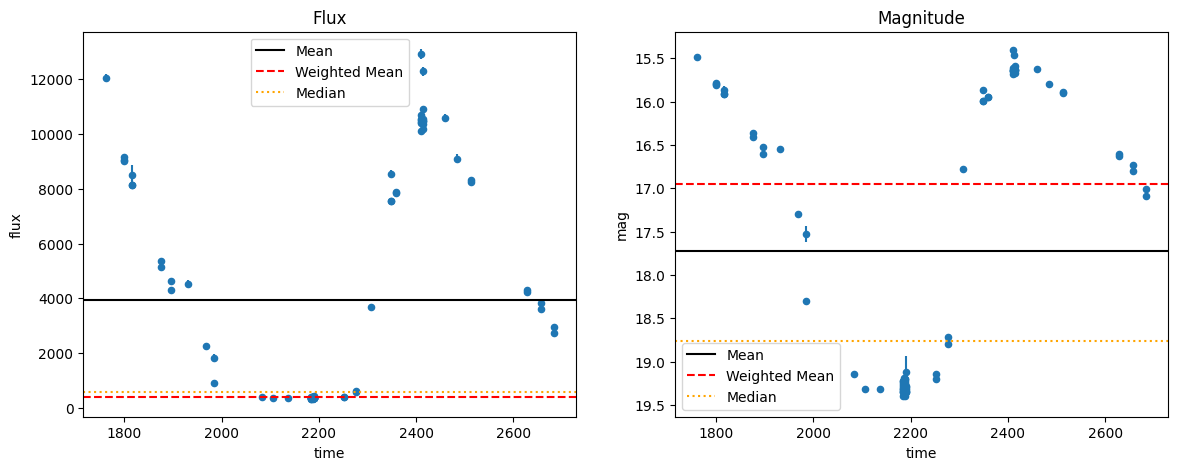

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(14,5))
etoileGband.plot.scatter(x="time", y="flux", yerr="flux_error", title="Flux", ax=ax[0])
ax[0].axhline(y=flux_simple_mean, color='black', linestyle='-',label="Mean")
ax[0].axhline(y=flux_weighted_mean, color='r', linestyle='dashed',label="Weighted Mean")
ax[0].axhline(y=flux_median, color='orange', linestyle='dotted',label="Median")
ax[0].legend()
etoileGband.plot.scatter(x="time", y="mag", yerr="mag_error", title="Magnitude", ax=ax[1])
ax[1].axhline(y=mag_simple_mean, color='black', linestyle='-',label="Mean")
ax[1].axhline(y=mag_weighted_mean, color='r', linestyle='dashed',label="Weighted Mean")
ax[1].axhline(y=mag_median, color='orange', linestyle='dotted',label="Median")
ax[1].legend()
ax[1].invert_yaxis()
plt.show()